# Shear Force and Bending Moment Diagrams

Plot the shear force and bending moment diagrams for the following beam

<div>
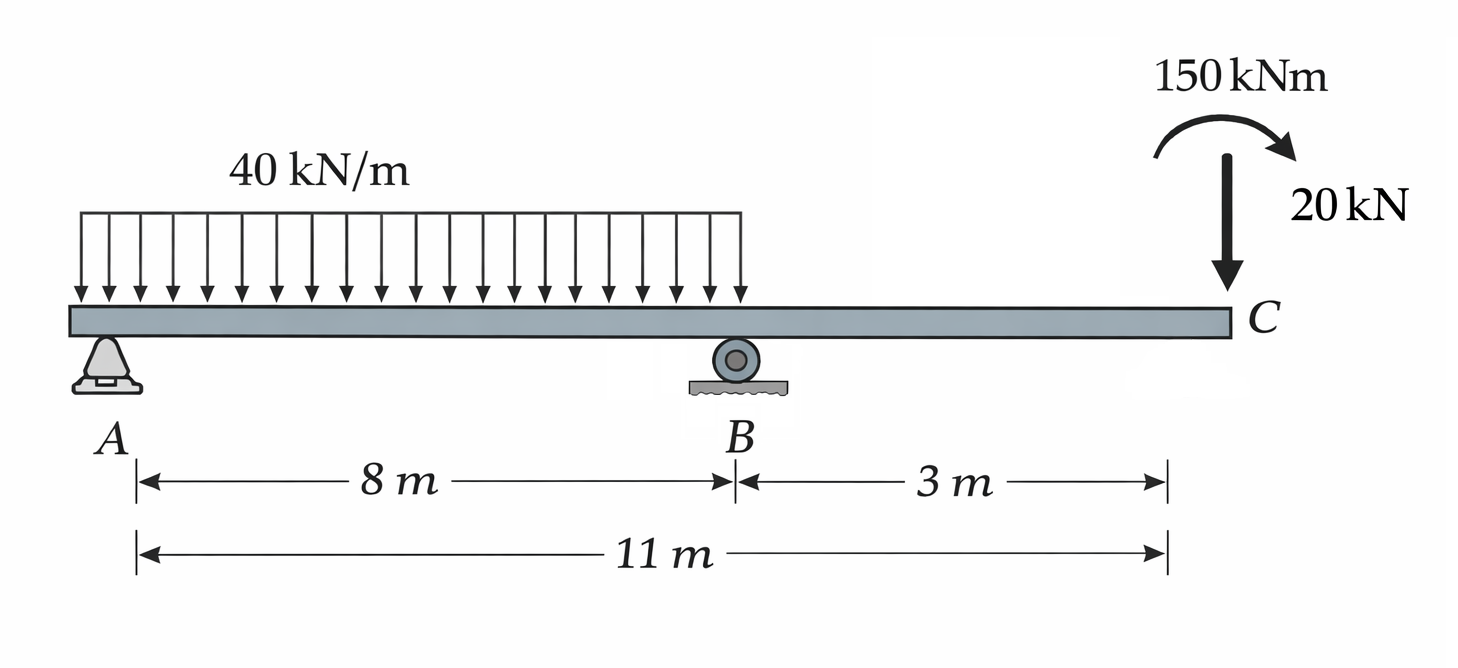
</div>


In [113]:
import planesections as ps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Defining the Beam

In [114]:
# Define node locations, and support conditions
L = 11
beam = ps.newEulerBeam(L)

# Define beam and fixities
pinned = [1, 1, 0]    # Pinned support
roller = [0, 1, 0]    # Roller support 
#fixed = [1, 1, 1]    # Fixed support

beam.setFixity(0, pinned)
beam.setFixity(8, roller)

# Define loads
beam.addDistLoadVertical(0, 8, -40, label='40 kN/m')    # Distributed load between points A and B
beam.addVerticalLoad(11, -20, label='20 kN')    # Point load at point C
beam.addMoment(11, -150, label='150 kNm')    # Bending moment at point C

## Plotting the Beam

(<Figure size 2400x480 with 1 Axes>, <AxesSubplot: >)

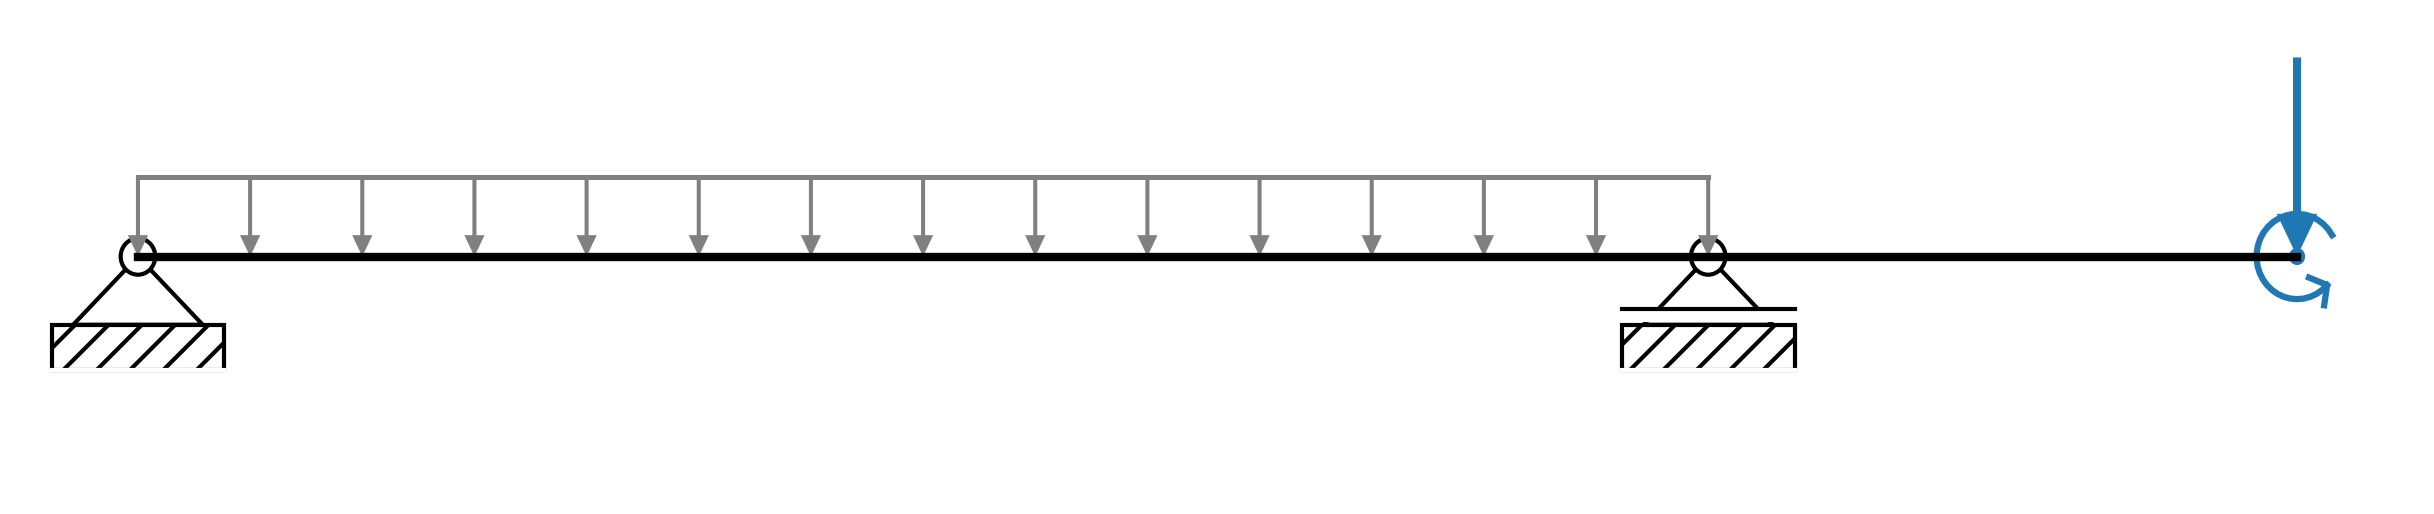

In [115]:
# Plot the beam diagram
ps.plotBeamDiagram(beam)

## Run the Analysis

In [116]:
# Run the analysis
analysis = ps.PyNiteAnalyzer2D(beam)
analysis.runAnalysis()

## Plotting Results (Using Built-In Tool)

(<Figure size 1920x1440 with 1 Axes>,
 <AxesSubplot: xlabel='Distance (m)', ylabel='Internal Force  (Nm)'>,
 [<matplotlib.lines.Line2D at 0x18370855c90>])

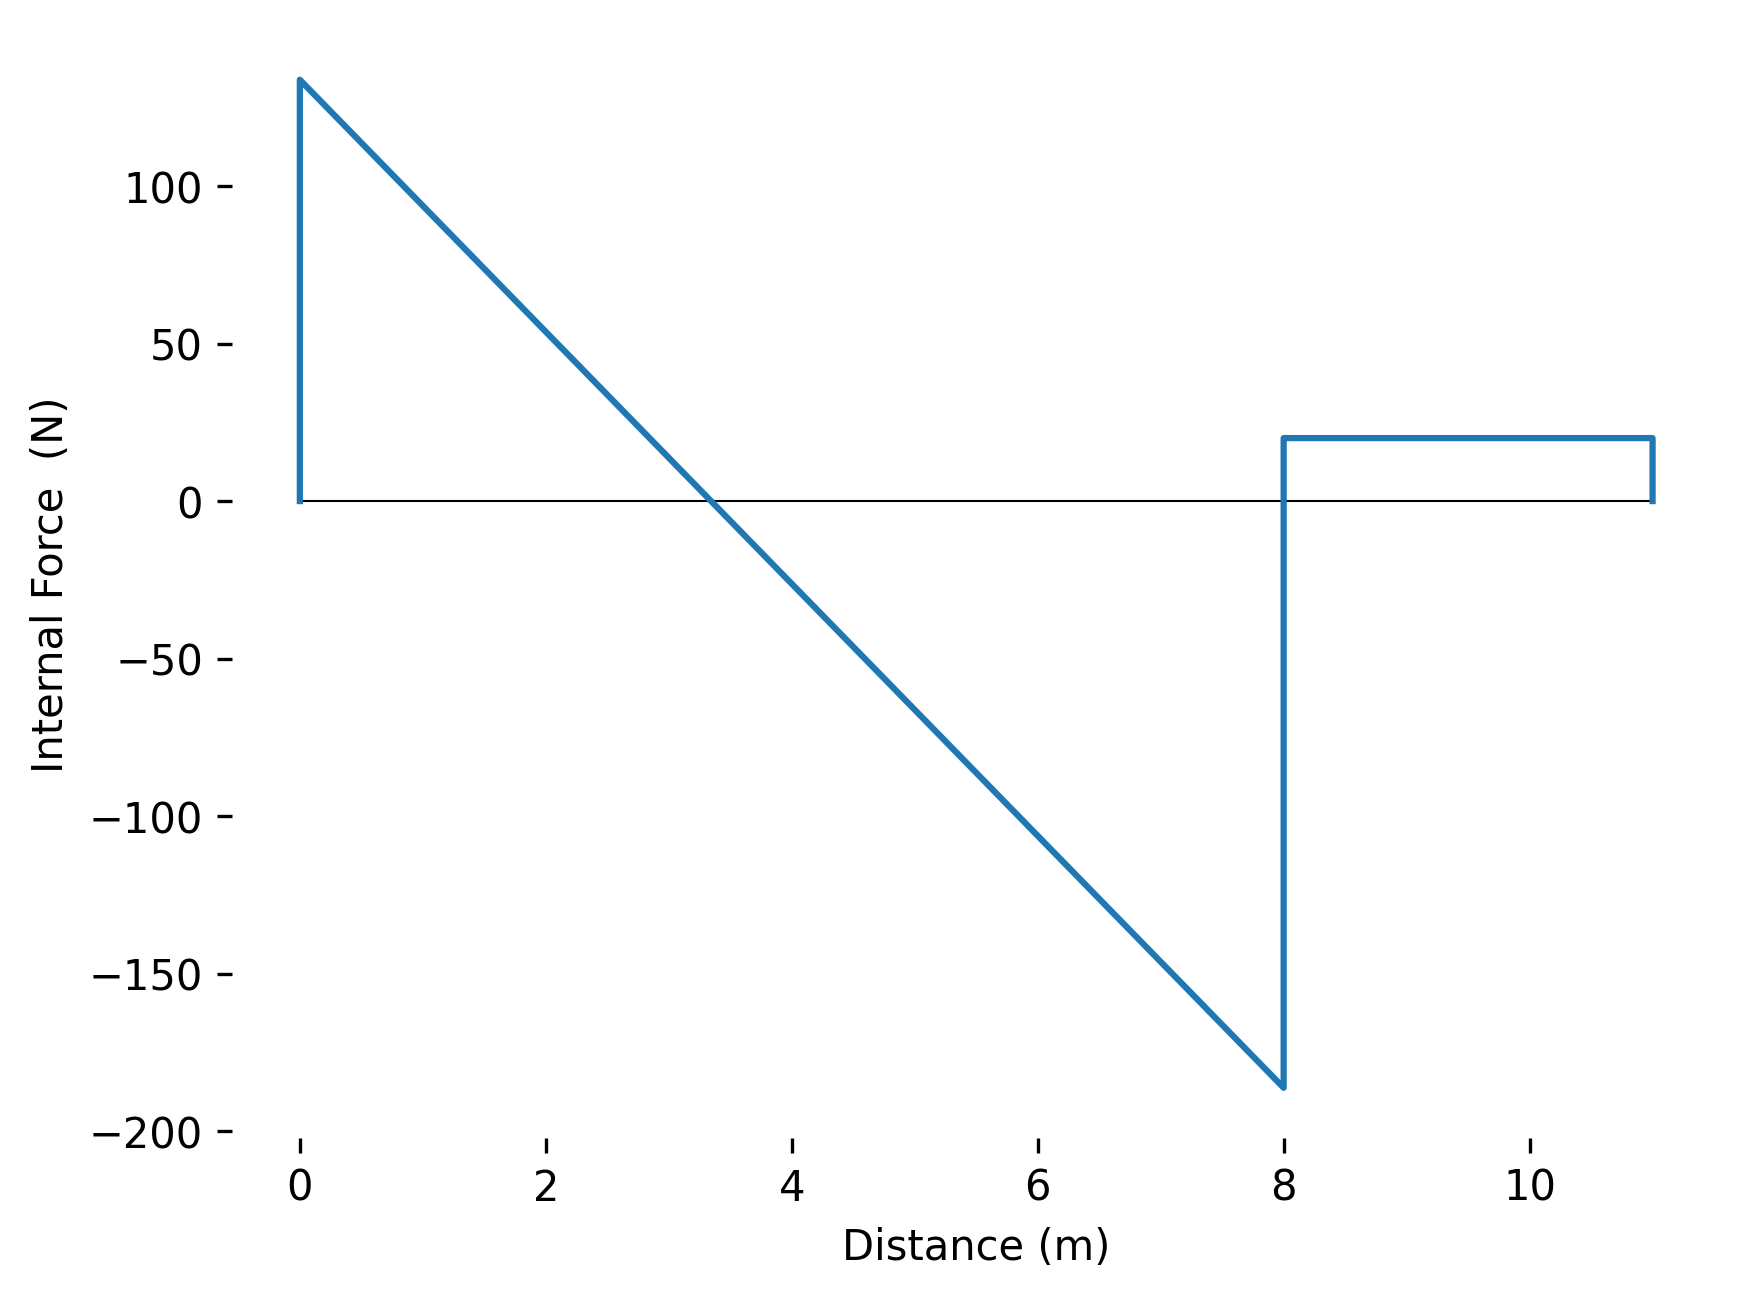

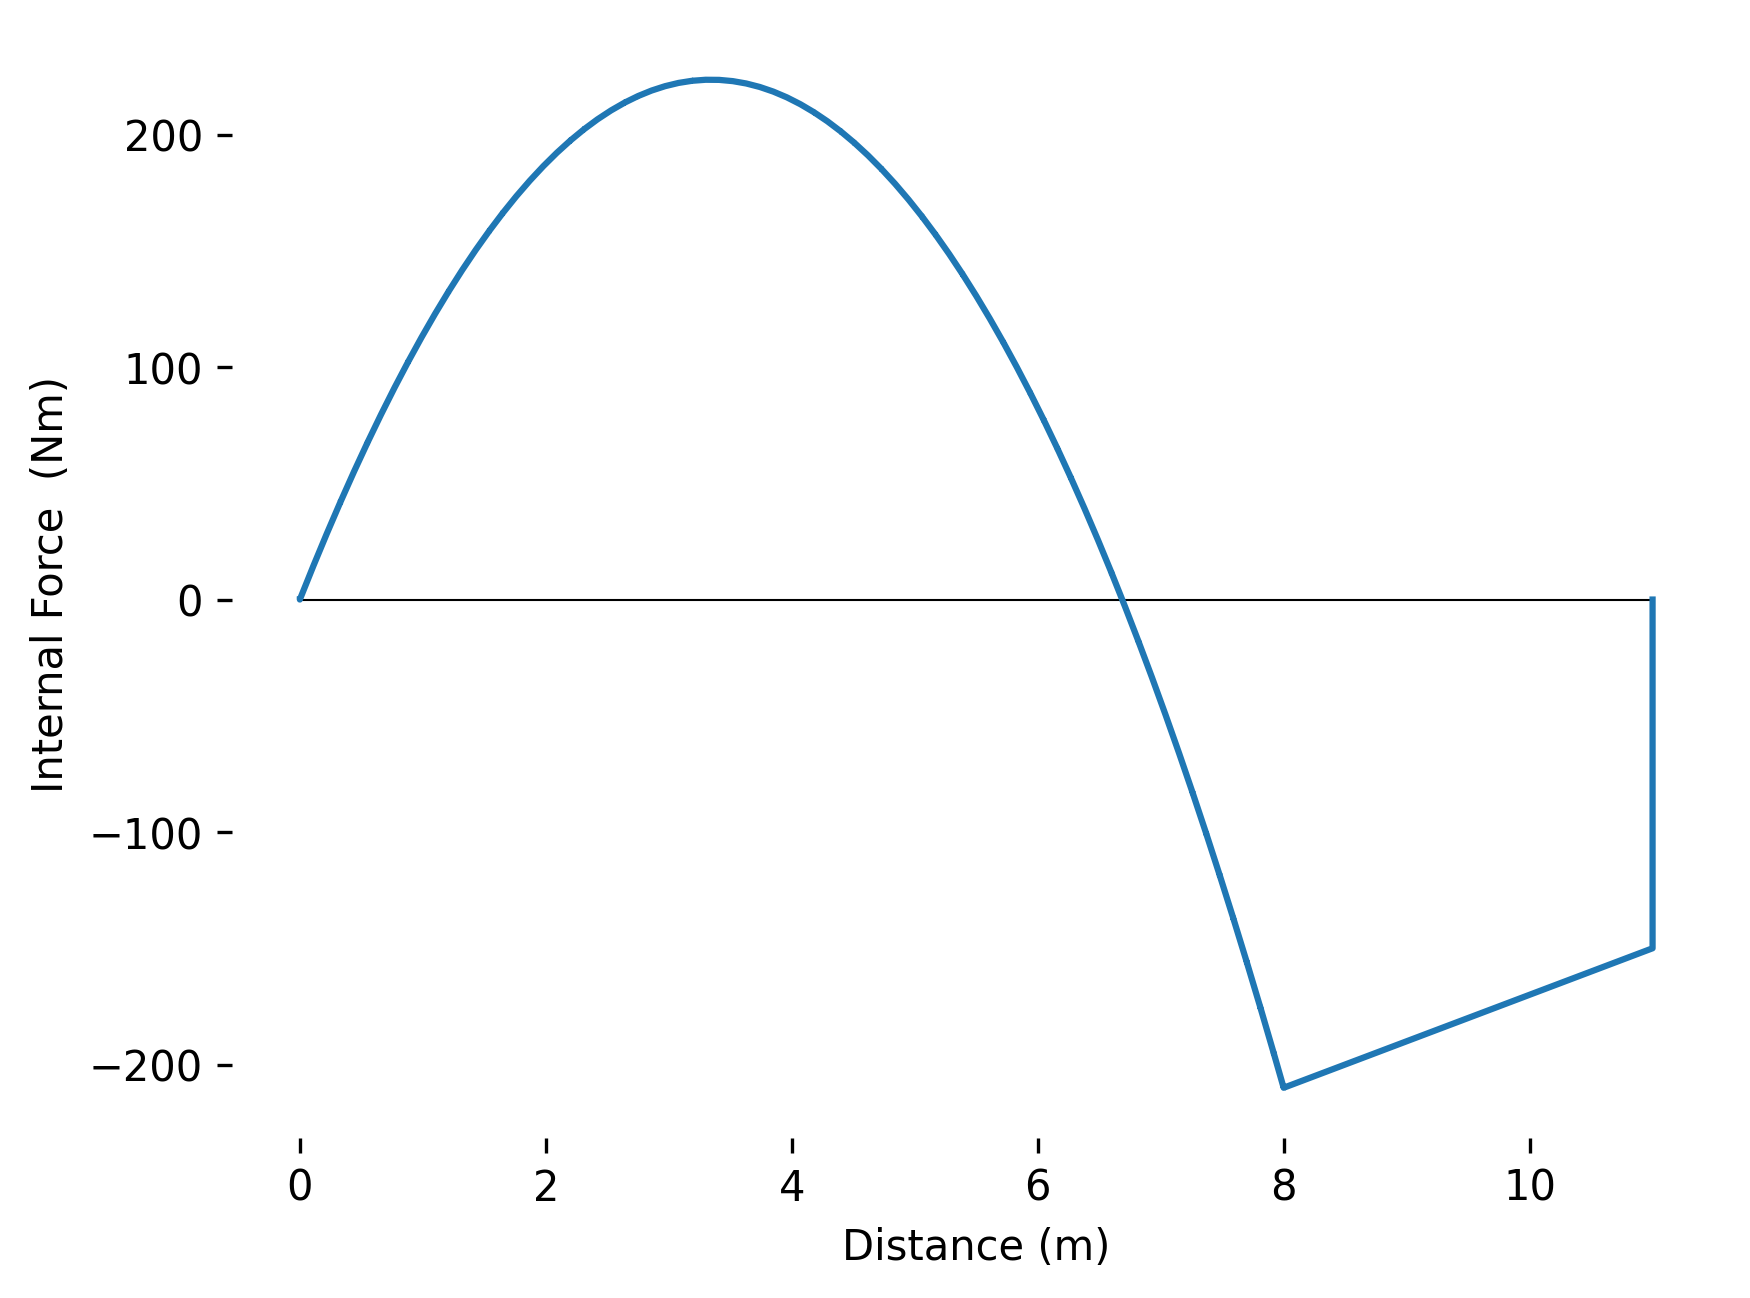

In [117]:
# Plot the SFD and BMD
ps.plotShear(beam)
ps.plotMoment(beam)

## Plotting Results (Using Matplotlib)

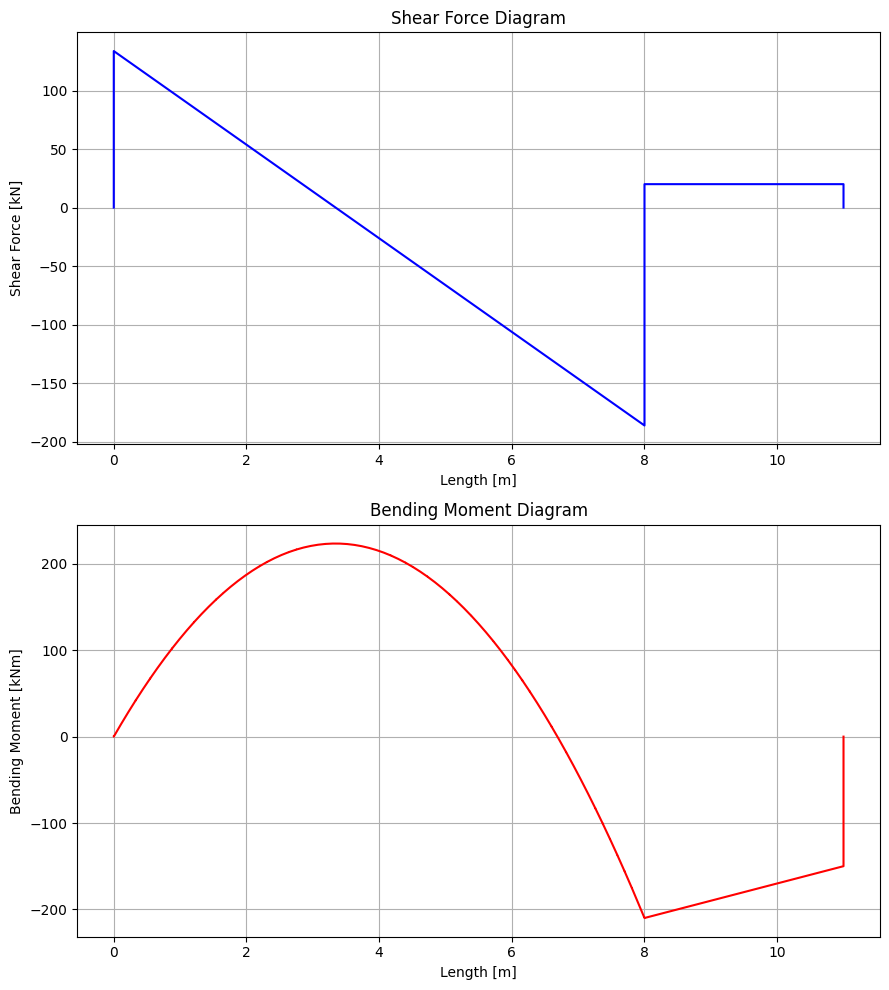

In [118]:
fig, axis = plt.subplots(2, 1, figsize=(9, 10))

# Shear Force
x_v = beam.getInternalForce(1)[0] #Internal Force is provided as two arrays, one for beam length and one for shear force
v = beam.getInternalForce(1)[1]

axis[0].plot(x_v, v, color='blue')
axis[0].set_xlabel('Length [m]')
axis[0].set_ylabel('Shear Force [kN]')
axis[0].set_title('Shear Force Diagram')
axis[0].grid()

# Bending Momemnt
x_m = beam.getInternalForce(2)[0]
m = -beam.getInternalForce(2)[1] # Bending moment has to be multiplied by -1 in extrapolated data

axis[1].plot(x_m, m, color='red')
axis[1].set_xlabel('Length [m]')
axis[1].set_ylabel('Bending Moment [kNm]')
axis[1].set_title('Bending Moment Diagram')
axis[1].grid()

plt.tight_layout()

## Animating the Plots (Optional)

In [119]:
%matplotlib notebook

<IPython.core.display.Javascript object>


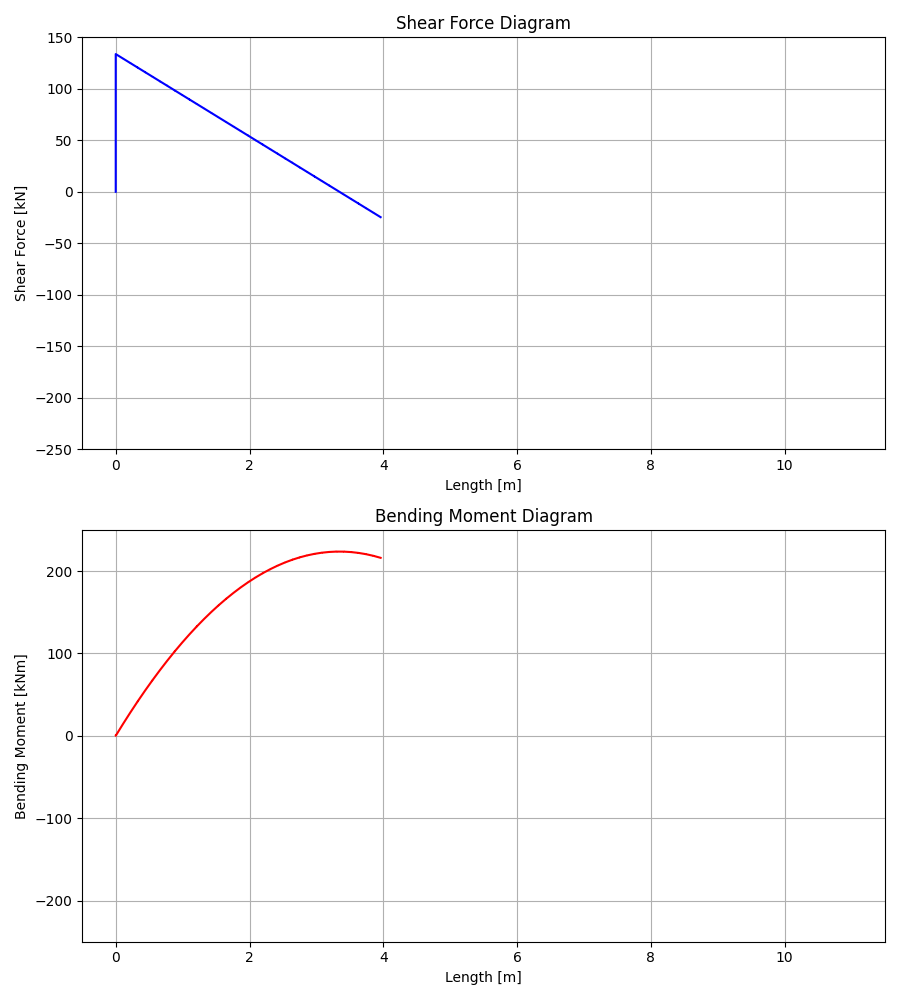

In [132]:
fig, axis = plt.subplots(2, 1, figsize=(9, 10))

# Shear Force
x_v = beam.getInternalForce(1)[0] #Internal Force is provided as 2 arrays, 1 for beam length and one for shear force
v = beam.getInternalForce(1)[1]

animated_shear, = axis[0].plot([], [], color='blue')

axis[0].set_xlabel('Length [m]')
axis[0].set_ylabel('Shear Force [kN]')
axis[0].set_title('Shear Force Diagram')
axis[0].set_xlim(-0.5, 11.5)
axis[0].set_ylim(-250, 150)
axis[0].grid()

# Bending Momemnt
x_m = beam.getInternalForce(2)[0]
m = -beam.getInternalForce(2)[1]

animated_moment, = axis[1].plot([], [], color='red')

axis[1].set_xlabel('Length [m]')
axis[1].set_ylabel('Bending Moment [kNm]')
axis[1].set_title('Bending Moment Diagram')
axis[1].set_xlim(-0.5, 11.5)
axis[1].set_ylim(-250, 250)
axis[1].grid()

def update(frame):
    
    animated_shear.set_data(x_v[:frame], v[:frame])
    animated_moment.set_data(x_m[:frame], m[:frame])
        
    return animated_shear, animated_moment

animation = FuncAnimation(
                    fig=fig,
                    func=update,
                    frames=len(x_v),
                    interval=25,
                    blit=True
                    )

animation.save("sfandbmdiagrams.gif")
plt.tight_layout()